# Evaluating Logistic Regression Models - Lab

## Introduction

As we saw with KNN, we need alternative evaluation metrics to determine the effectiveness of classification algorithms. In regression, we were predicting values so it made sense to discuss error as a distance of how far off our estimates were. In classifying a binary variable however, we are either correct or incorrect. As a result, we tend to deconstruct this as how many false positives versus false negatives we come across.  
In particular, we examine a few different specific measurements when evaluating the performance of a classification algorithm. In this review lab, we'll review precision, recall and accuracy in order to evaluate our logistic regression models.


## Objectives
You will be able to:  
* Understand and assess precision recall and accuracy of classifiers
* Evaluate classification models using various metrics

## Terminology Review  

Let's take a moment and review some classification evaluation metrics:  


$Precision = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}}$    
  

$Recall = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}}$  
  
$Accuracy = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}}$

![](./images/Precisionrecall.png)

At times, we may wish to tune a classification algorithm to optimize against precison or recall rather then overall accuracy. For example, imagine the scenario of predicting whether or not a patient is at risk for cancer and should be brought in for additional testing. In cases such as this, we often may want to cast a slightly wider net, and it is much preferable to optimize for precision, the number of cancer positive cases, then it is to optimize recall, the percentage of our predicted cancer-risk patients who are indeed positive.

## 1. Split the data into train and test sets

In [ ]:
import pandas as pd

In [3]:
#Your code here
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 2. Create a standard logistic regression model

In [12]:
#Your code here
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [18]:
X = df[df.columns[:-1]]
y = df['target']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [57]:
# initialize the classifier
LogReg = LogisticRegression()
# fit the training data
LogReg.fit(X_train, y_train)
y_pred_test = LogReg.predict(X_test)
y_pred_train = LogReg.predict(X_train)

## 3. Write a function to calculate the precision

In [35]:
from sklearn.metrics import confusion_matrix
import numpy as np
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[26, 14],
       [ 2, 34]])

In [38]:
conf_matrix[0,:]

array([26, 14])

In [36]:
np.sum(conf_matrix[:,1])

48

In [63]:
def precision(y_hat, y):
    conf_matrix = confusion_matrix(y, y_hat)
    true_positives = conf_matrix[1][1]
    pred_positives = np.sum(conf_matrix[1, :])
    return true_positives / pred_positives

precision(y_pred, y_test)

0.9444444444444444

## 4. Write a function to calculate the recall

In [42]:
conf_matrix[1,1]

34

In [43]:
def recall(y_hat, y):
    conf_matrix = confusion_matrix(y, y_hat)
    true_positives = conf_matrix[1,1]
    actual_positives = np.sum(conf_matrix[:, 1])
    return true_positives / actual_positives

recall(y_pred, y_test)

0.7083333333333334

## 5. Write a function to calculate the accuracy

In [50]:
np.sum(conf_matrix)

76

In [56]:
def accuracy(y_hat, y):
    #Your code here
    conf_matrix = confusion_matrix(y, y_hat)
    true_pos = conf_matrix[0, 0] 
    true_neg = conf_matrix[1, 1]
    true_neg_pos = true_neg + true_pos
    total_obs = np.sum(conf_matrix)
    return true_neg_pos / total_obs

accuracy(y_pred, y_test)

0.7894736842105263

## 6. Calculate the precision, recall and accuracy of your classifier

Do this for both the train and the test set.

In [64]:
#Your code here
# training data
print(precision(y_pred_train, y_train))
print(recall(y_pred_train, y_train))
print(accuracy(y_pred_train, y_train))

0.9302325581395349
0.851063829787234
0.8678414096916299


In [67]:
#test data
print(precision(y_pred_test, y_test))
print(recall(y_pred_test, y_test))
print(accuracy(y_pred_test, y_test))

0.9444444444444444
0.7083333333333334
0.7894736842105263


## 7. Comparing Precision Recall and Accuracy of Test vs Train Sets


Plot the precision, recall and accuracy for test and train splits using different train set sizes. What do you notice?

In [62]:
import matplotlib.pyplot as plt

In [76]:
training_Precision = []
testing_Precision = []
training_Recall = []
testing_Recall = []
training_Accuracy = []
testing_Accuracy = []

for i in range(10,95):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= i/100) #replace the "None" here
    logreg = LogisticRegression(fit_intercept = False, C = 1e12)
    model_log = logreg.fit(X, y)
    y_hat_test = model_log.predict(X_test)
    y_hat_train = model_log.predict(X_train)

# 6 lines of code here
    training_Precision.append(precision(y_hat_train, y_train))
    training_Recall.append(recall(y_hat_train, y_train))
    training_Accuracy.append(accuracy(y_hat_train, y_train))
    testing_Precision.append(precision(y_hat_test, y_test))
    testing_Recall.append(recall(y_hat_test, y_test))
    testing_Accuracy.append(accuracy(y_hat_test, y_test))

Create 3 scatter plots looking at the test and train precision in the first one, test and train recall in the second one, and testing and training accuracy in the third one.

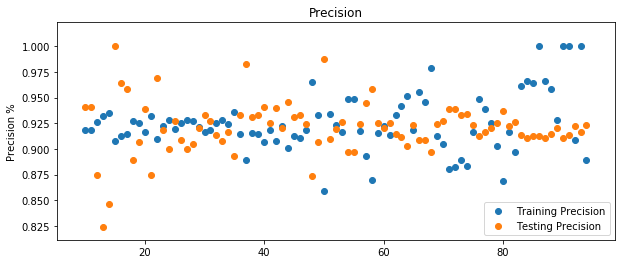

In [84]:
# code for test and train precision
plt.figure(figsize=(10, 4))
plt.scatter(x=range(10, 95), y=training_Precision, label='Training Precision')
plt.scatter(x=range(10, 95), y=testing_Precision, label='Testing Precision')
plt.title('Precision')
plt.ylabel('Precision %')
plt.legend(loc='best')
plt.show();

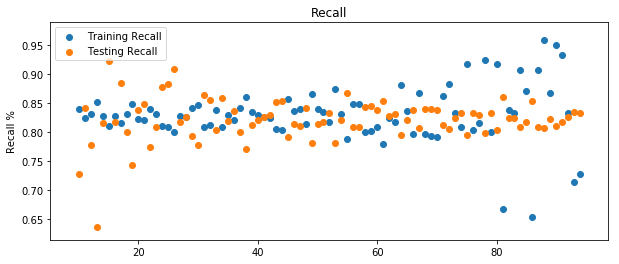

In [89]:
# code for test and train recall
plt.figure(figsize=(10, 4))
plt.scatter(x=range(10, 95), y=training_Recall, label='Training Recall')
plt.scatter(x=range(10, 95), y=testing_Recall, label='Testing Recall')
plt.title('Recall')
plt.ylabel('Recall %')
plt.legend(loc='best')
plt.show();

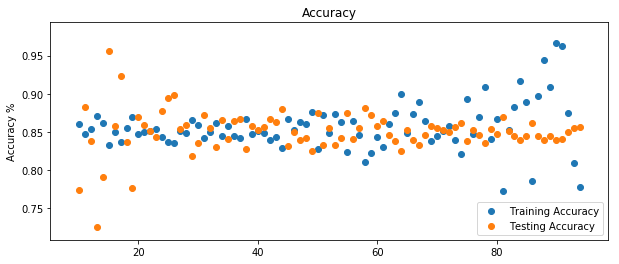

In [90]:
# code for test and train accuracy
plt.figure(figsize=(10, 4))
plt.scatter(x=range(10, 95), y=training_Accuracy, label='Training Accuracy')
plt.scatter(x=range(10, 95), y=testing_Accuracy, label='Testing Accuracy')
plt.title('Accuracy')
plt.ylabel('Accuracy %')
plt.legend(loc='best')
plt.show();

## Summary

Nice! In this lab, you gained some extra practice with evaluation metrics for classification algorithms. You also got some further python practice by manually coding these functions yourself, giving you a deeper understanding of how they work. Going forward, continue to think about scenarios in which you might prefer to optimize one of these metrics over another.